<a href="https://colab.research.google.com/github/saileshraturi/CNN-over-FashionMNIST/blob/master/CNN_over_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

In [0]:
#import the data

fashion_mnist = tf.keras.datasets.fashion_mnist

In [0]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [35]:
print(x_train.shape)

(60000, 28, 28)


In [0]:
x_train,x_test = x_train/255.0,x_test/255.0

In [0]:
x_train = np.expand_dims(x_train,-1) # to convert into 3D images for CNN
x_test = np.expand_dims(x_test,-1)

In [38]:
print(x_train.shape)

(60000, 28, 28, 1)


In [39]:
#total labels

k = len(set(y_train))
print(k)

10


In [0]:
#Build the model
i = Input(x_train[0].shape)
x = Conv2D(32, (3,3),strides = 2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k,activation='softmax')(x)


In [0]:
model = Model(i,x)

In [42]:
#compile and fit the model

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5172 - accuracy: 0.8107 - val_loss: 0.3754 - val_accuracy: 0.8591
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3532 - accuracy: 0.8672 - val_loss: 0.3602 - val_accuracy: 0.8673
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3079 - accuracy: 0.8839 - val_loss: 0.3088 - val_accuracy: 0.8843
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2763 - accuracy: 0.8954 - val_loss: 0.3002 - val_accuracy: 0.8910
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2518 - accuracy: 0.9052 - val_loss: 0.2874 - val_accuracy: 0.8954
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2303 - accuracy: 0.9126 - val_loss: 0.2867 - val_accuracy: 0.8970
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2143 - accuracy: 0.9188 - val_loss: 0.2902 - val_ac

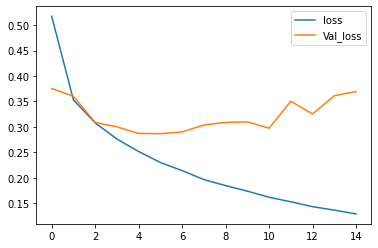

In [43]:
#Visualizing Loss and accuracy
plt.plot(r.history['loss'],label ='loss')
plt.plot(r.history['val_loss'],label = 'Val_loss')
plt.legend()

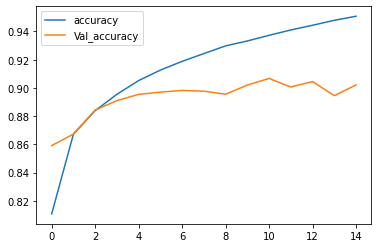

In [44]:
plt.plot(r.history['accuracy'],label ='accuracy')
plt.plot(r.history['val_accuracy'],label = 'Val_accuracy')
plt.legend()

In [0]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

confusion matrix without normalization
[[870   3  21  17   2   1  73   0  13   0]
 [  3 980   0  12   3   0   1   0   1   0]
 [ 19   1 869  10  40   0  58   0   3   0]
 [ 11   5  18 909  27   1  27   0   2   0]
 [  0   1  67  23 820   0  88   0   1   0]
 [  0   0   0   0   0 983   0  11   2   4]
 [135   2  61  23  66   1 699   0  13   0]
 [  0   0   0   0   0  20   0 938   0  42]
 [  3   1   1   2   2   3   3   2 981   2]
 [  1   0   0   0   0   7   0  20   0 972]]


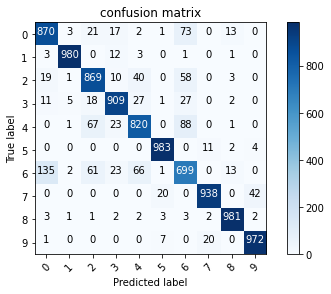

In [46]:
def plot_confusion_matrix(cm,classes,
                          normalize = False,
                          title = 'confusion matrix',
                          cmap =plt.cm.Blues):
  #This function print and plot the confusion matrix
  if normalize:
      cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('confusion matrix without normalization')
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation = 45)
  plt.yticks(tick_marks,classes)

  fmt ='.2f' if normalize else 'd'
  thresh = cm.max() / 2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j],fmt),
               horizontalalignment='center',
               color = 'white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

p_test = model.predict(x_test).argmax(axis =1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [0]:
#Label Mapping
labels = ''' T-shirt/Top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaket
Belt
AnkleBoot '''.split()

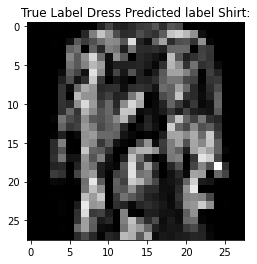

In [52]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i= np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True Label %s Predicted label %s:"% (labels[y_test[i]],labels[p_test[i]]));